<a href="https://colab.research.google.com/github/reidharris01/Lambda-Projects/blob/master/Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Figuring out when and where lockdowns were

In [2]:
# Read in excel file downloaded from ballotpedia.com
URL = 'https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/lockdowns.csv'
lockdowns = pd.read_csv(URL,skiprows=1, encoding= 'unicode_escape')
lockdowns

,State,Order dates,Link to order,Official name of order
0,Alabama,April 4- April 30,Link,Suspend certain public gatherings
1,Alaska,March 28 - April 27,Link,Shelter-in-place
2,Arizona,March 31 - May 15,Link,"Stay home, stay healthy, stay connected"
3,Arkansas,None,NaN,NaN
4,California,March 19 - TBD,Link,Shelter-in-place
5,Colorado,March 26 - April 26,Link,Stay-at-home
6,Connecticut,March 23 - May 20,Link,"Stay Safe, Stay Home"
7,Delaware,March 24 - May 31,Link,Stay-at-Home
8,Florida,April 2 - May 4,Link,Stay-at-home
9,Georgia,April 3 - April 30,Link,Shelter-in-place


In [3]:
# Don't need the URL to the governor's order
lockdowns = lockdowns.drop('Link to order',axis=1)
# Don't need the order's official name either
lockdowns = lockdowns.drop('Official name of order',axis=1)

lockdowns.head()

,State,Order dates
0,Alabama,April 4- April 30
1,Alaska,March 28 - April 27
2,Arizona,March 31 - May 15
3,Arkansas,None
4,California,March 19 - TBD


<font color='red'>**Need to see start and end dates separately. Best if they're in timestamp format.**

In [4]:
# First, split the date strings into two elements of a list
lockdowns['lockdown_start_end'] = lockdowns['Order dates'].str.split('-')

# Assign those list elements to new columns
lockdowns[['lockdown_start','lockdown_end']] = pd.DataFrame(lockdowns.lockdown_start_end.tolist(), index=lockdowns.index)

# Get rid of redundancy
lockdowns = lockdowns.drop(['Order dates','lockdown_start_end'],axis=1)

# Replace the 'None' and 'TBD' values with June 17th (the current date for our datasets)
lockdowns = lockdowns.replace({' TBD':'June 17','None':np.nan,None:np.nan})

# In order to use dates/times, we want timestamps.  In order to make timestamps, we need to have a year
# So, I'll add on ', 2020' to each element first
lockdowns['lockdown_start'] = lockdowns['lockdown_start'].astype(str) + ', 2020'
lockdowns['lockdown_end'] = lockdowns['lockdown_end'].astype(str) + ', 2020'

# We don't want the string 'nan, 2020', though
lockdowns = lockdowns.replace('nan, 2020',np.nan)

# Un-capitalizing 'State' to be pythonic
lockdowns.rename(columns={"State":"state"},errors="raise",inplace=True)

lockdowns

,state,lockdown_start,lockdown_end
0,Alabama,"April 4, 2020","April 30, 2020"
1,Alaska,"March 28 , 2020","April 27, 2020"
2,Arizona,"March 31 , 2020","May 15, 2020"
3,Arkansas,NaN,NaN
4,California,"March 19 , 2020","June 17, 2020"
5,Colorado,"March 26 , 2020","April 26, 2020"
6,Connecticut,"March 23 , 2020","May 20, 2020"
7,Delaware,"March 24 , 2020","May 31, 2020"
8,Florida,"April 2 , 2020","May 4, 2020"
9,Georgia,"April 3 , 2020","April 30, 2020"


In [5]:
# Now we can timestamp so that we can add/subtract columns
lockdowns['lockdown_start'] = pd.to_datetime(lockdowns['lockdown_start'])
lockdowns['lockdown_end'] = pd.to_datetime(lockdowns['lockdown_end'])

lockdowns.head()

,state,lockdown_start,lockdown_end
0,Alabama,2020-04-04,2020-04-30
1,Alaska,2020-03-28,2020-04-27
2,Arizona,2020-03-31,2020-05-15
3,Arkansas,NaT,NaT
4,California,2020-03-19,2020-06-17


In [6]:
print("Earliest Lockdown Start:",lockdowns['lockdown_start'].min(), "\nLatest Lockdown Start:",lockdowns['lockdown_start'].max())
print("Earliest Lockdown End:",lockdowns['lockdown_end'].min(), "\nLatest Lockdown End:",lockdowns['lockdown_end'].max())

Earliest Lockdown Start: 2020-03-19 00:00:00 
Latest Lockdown Start: 2020-04-07 00:00:00
Earliest Lockdown End: 2020-04-26 00:00:00 
Latest Lockdown End: 2020-08-28 00:00:00


<font color='red'>**This shows that all states that had lockdowns were in effect from 4/7 - 4/26.  We'll use this timeframe for the past five years for comparison of lockdown vs. open UFO sightings.**

In [7]:
# Also good to know which states had no lockdowns at all
states_with_no_lockdowns = []
for i in range(0,lockdowns.shape[0]):
  if type(lockdowns['lockdown_start'][i]) == pd._libs.tslibs.nattype.NaTType: # Checks for "Not A Time" data types
    states_with_no_lockdowns.append(lockdowns['state'][i])
print("States that never had a lockdown order:", states_with_no_lockdowns)

States that never had a lockdown order: ['Arkansas', 'Iowa', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']


In [8]:
# We'll make those into state abbreviations
states_with_no_lockdowns = ['AR','IA','NE','ND','SD','UT','WY']

# Cleaning UFO data


<font color='red'>**Our goal is to create two dataframes:  One with UFO sightings from previous years during the period 4/7 - 4/26, and another with UFO sightings from 4/7 - 4/26, 2020.**

In [9]:
apr16 = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/nuforcapril2016.csv')
apr16

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,4/30/2016 23:50,Easton,PA,Triangle,30 seconds,"Low-flying, dark triangle seen over Easton, PA",5/6/2016
1,4/30/2016 22:30,Westport,WI,Fireball,5 minutes,Glowing orange ball over lake Mendota in Wisco...,5/6/2016
2,4/30/2016 22:30,El Paso,TX,Fireball,>4 minutes,A fireball was traveling horizontally to the l...,5/6/2016
3,4/30/2016 22:00,Philadelphia,PA,Light,3 minutes,Barbecuing on the deck Saturday night and was ...,5/6/2016
4,4/30/2016 21:30,Philadelphia,PA,Fireball,15 minutes,Orange orbs in groups of four or five flying i...,5/6/2016
...,...,...,...,...,...,...,...
390,4/1/2016 5:00,Fayetteville,AR,Fireball,5 seconds,"Bright star, then vanished.",4/15/2016
391,4/1/2016 4:40,Port Orange,FL,Triangle,15 seconds,As we were star gazing this weird triangle for...,4/1/2016
392,4/1/2016 4:23,San Jose,CA,Light,2:30 am to now,Here has been a bright light object above my a...,4/1/2016
393,4/1/2016 0:34,Pomona,NY,Light,5 seconds,Large light that flashed and blinked out.,4/15/2016


In [10]:
# Read in excel files downloaded from the National Unidentified Flying Objects Reporting Center's website
apr16 = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/nuforcapril2016.csv',encoding='unicode_escape')
apr17 = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/nuforcapril2017.csv',encoding='unicode_escape')
apr18 = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/nuforcapril2018.csv',encoding='unicode_escape')
apr19 = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/nuforcapril2019.csv',encoding='unicode_escape')
apr20 = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/nuforcapril2020.csv',encoding='unicode_escape')

In [11]:
# First we'll concatenate all of them so that we can clean them all together
# (Later, we'll pull apart the COVID observations from the previous year observations)
reports_all = pd.concat([apr16,apr17,apr18,apr19,apr20],ignore_index=True)
# We're only looking at states with lockdowns, so let's remove states with no lockdowns right off the bat
for i in range(0,reports_all.shape[0]):
  if reports_all['State'][i] in states_with_no_lockdowns:
    reports_all.drop(index=i,inplace=True)

# Reset index numbers so it's iterable again
reports_all.reset_index(inplace=True)
reports_all.drop(['index'],axis=1,inplace=True)

print(reports_all.shape)
display(reports_all.head())
display(reports_all.tail())

(2390, 7)


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,4/30/2016 23:50,Easton,PA,Triangle,30 seconds,"Low-flying, dark triangle seen over Easton, PA",5/6/2016
1,4/30/2016 22:30,Westport,WI,Fireball,5 minutes,Glowing orange ball over lake Mendota in Wisco...,5/6/2016
2,4/30/2016 22:30,El Paso,TX,Fireball,>4 minutes,A fireball was traveling horizontally to the l...,5/6/2016
3,4/30/2016 22:00,Philadelphia,PA,Light,3 minutes,Barbecuing on the deck Saturday night and was ...,5/6/2016
4,4/30/2016 21:30,Philadelphia,PA,Fireball,15 minutes,Orange orbs in groups of four or five flying i...,5/6/2016


,Date / Time,City,State,Shape,Duration,Summary,Posted
2385,4/1/2020 10:00,Johnscreek,GA,Circle,10,"Glowing circular disc was spinning clock wise,...",5/15/2020
2386,4/1/2020 9:45,Woodbury,MN,Sphere,1 minutes,I was looking out my window and saw a bright w...,6/25/2020
2387,4/1/2020 9:28,Nairobi (Kenya),NaN,Sphere,15-20 minutes,Shining sphere,6/25/2020
2388,4/1/2020 4:00,Anderson,SC,Light,30+ minutes,2 lights appeared out of nowhere just down and...,6/25/2020
2389,4/1/2020 3:45,Petersham,MA,Fireball,2+ minutes,"Ok, this is NOT an April fools joke. At 3:45 t...",4/9/2020


<font color='red'>**Now we'll clean these up so that we have only the info that we need, and only keep those observations that fall within the 4/7 - 4/26 window.**

In [12]:
# Making column names more pythonic
reports_all.rename(columns={"Date / Time":"date_time","City":"city","State":"state","Shape":"shape","Duration":"duration",
                                "Summary":"summary","Posted":"posted"},inplace=True, errors='raise')
# Change the data to time stamps
reports_all["date_time"] = pd.to_datetime(reports_all["date_time"])
# Only want the state and date_time columns
reports_all.drop(['city','shape','duration','summary','posted'],axis=1,inplace=True)
# Also, don't want any Canadian provinces, so turn them to NaN's, then drop all NaN's
reports_all = reports_all.replace({'NL':np.nan,'PE':np.nan,'NS':np.nan,'NB':np.nan,'QC':np.nan,'ON':np.nan,'MB':np.nan,'SK':np.nan,'AB':np.nan,'BC':np.nan,
                                   'YT':np.nan,'NT':np.nan,'NU':np.nan})
reports_all.dropna(inplace=True)
# We'll be missing indicies after that drop, so we'll reset index values so it's still iterable for later
reports_all.reset_index(inplace=True)
reports_all.drop(['index'],axis=1,inplace=True)
# Just want the dates, not the times
reports_all.rename({'date_time':'date'},axis=1,inplace=True)
reports_all['date'] = reports_all['date'].dt.date
# Take a peek
print(reports_all.shape)
display(reports_all)

(2158, 2)


,date,state
0,2016-04-30,PA
1,2016-04-30,WI
2,2016-04-30,TX
3,2016-04-30,PA
4,2016-04-30,PA
...,...,...
2153,2020-04-01,MA
2154,2020-04-01,GA
2155,2020-04-01,MN
2156,2020-04-01,SC


In [13]:
# Drop the observations that don't fall within 4/7 - 4/26 of each year
for i in range(0,reports_all.shape[0]):
  if reports_all['date'][i] < pd.to_datetime("2016-04-07"):
    reports_all = reports_all.drop(index=i)
  elif pd.to_datetime("2016-04-26") < reports_all['date'][i] < pd.to_datetime("2017-04-07"):
    reports_all = reports_all.drop(index=i)
  elif pd.to_datetime("2017-04-26") < reports_all['date'][i] < pd.to_datetime("2018-04-07"):
    reports_all = reports_all.drop(index=i)
  elif pd.to_datetime("2018-04-26") < reports_all['date'][i] < pd.to_datetime("2019-04-07"):
    reports_all = reports_all.drop(index=i)
  elif pd.to_datetime("2019-04-26") < reports_all['date'][i] < pd.to_datetime("2020-04-07"):
    reports_all = reports_all.drop(index=i)
  elif pd.to_datetime("2020-04-26") < reports_all['date'][i]:
    reports_all = reports_all.drop(index=i)
  else:
    pass
# Reset indices
reports_all.reset_index(inplace=True)
reports_all.drop(['index'],axis=1,inplace=True)

print(reports_all.shape)
reports_all.head()
reports_all.tail()

(1511, 2)


,date,state
1506,2020-04-07,FL
1507,2020-04-07,AZ
1508,2020-04-07,WA
1509,2020-04-07,AL
1510,2020-04-07,OR


# Separate UFO data by observation dates

In [14]:
# Now split into lockdown period (2020) and previous years
# Start by duplicating the df under new names
reports_covid = pd.DataFrame(reports_all)
reports_previous = pd.DataFrame(reports_all)
# Iterate through all the reports, dropping indices from one df or the other
for i in range(0,reports_all.shape[0]):
  if reports_all['date'][i] < pd.to_datetime("2020-04-07"):
    reports_covid.drop(index=i,inplace=True)
  elif reports_all['date'][i] >= pd.to_datetime("2020-04-07"):
    reports_previous.drop(index=i,inplace=True)

# Reset indices
reports_covid.reset_index(inplace=True)
reports_covid.drop(['index'],axis=1,inplace=True)
reports_previous.reset_index(inplace=True)
reports_previous.drop(['index'],axis=1,inplace=True)

In [15]:
print(reports_previous.shape)
display(reports_previous.head())
print(reports_covid.shape)
display(reports_covid.head())

(861, 2)


,date,state
0,2016-04-26,LA
1,2016-04-26,LA
2,2016-04-26,TX
3,2016-04-26,CA
4,2016-04-26,CA


(650, 2)


,date,state
0,2020-04-26,TX
1,2020-04-26,IN
2,2020-04-26,CA
3,2020-04-26,MI
4,2020-04-26,MT


In [16]:
# We might also want to look at the previous years individually as well, so we'll store those as df's with distinct names
reports16 = pd.DataFrame(reports_previous)
reports17 = pd.DataFrame(reports_previous)
reports18 = pd.DataFrame(reports_previous)
reports19 = pd.DataFrame(reports_previous)
for i in range(0,reports_previous.shape[0]):
  if reports_previous['date'][i].year != 2016:
    reports16.drop(index=i,inplace=True)
for i in range(0,reports_previous.shape[0]):
  if reports_previous['date'][i].year != 2017:
    reports17.drop(index=i,inplace=True)
for i in range(0,reports_previous.shape[0]):
  if reports_previous['date'][i].year != 2018:
    reports18.drop(index=i,inplace=True)
for i in range(0,reports_previous.shape[0]):
  if reports_previous['date'][i].year != 2019:
    reports19.drop(index=i,inplace=True)

# Reset all their indicies, too
reports16.reset_index(inplace=True)
reports16.drop(['index'],axis=1,inplace=True)
reports17.reset_index(inplace=True)
reports17.drop(['index'],axis=1,inplace=True)
reports18.reset_index(inplace=True)
reports18.drop(['index'],axis=1,inplace=True)
reports19.reset_index(inplace=True)
reports19.drop(['index'],axis=1,inplace=True)

In [17]:
print(reports16.shape)
display(reports16.head())
print(reports19.shape)
reports19.head()

(233, 2)


,date,state
0,2016-04-26,LA
1,2016-04-26,LA
2,2016-04-26,TX
3,2016-04-26,CA
4,2016-04-26,CA


(230, 2)


,date,state
0,2019-04-26,NJ
1,2019-04-26,FL
2,2019-04-26,NY
3,2019-04-26,GA
4,2019-04-26,CO


# State populations

In [18]:
# Read in csv downloaded from census.gov
pops = pd.read_csv('https://raw.githubusercontent.com/reidharris01/Lambda-Projects/master/census%20population%20by%20state%202019.csv')
print(pops.shape)
pops.head()

(57, 151)


,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,BIRTHS2019,DEATHS2010,DEATHS2011,DEATHS2012,...,RDEATH2016,RDEATH2017,RDEATH2018,RDEATH2019,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RNATURALINC2019,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RINTERNATIONALMIG2019,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,563561,2235208,2274116,2162725,2307293,2334155,2306148,2044228,1701962,1552022,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3824521,3791712,598691,2512442,2501531,...,8.400602,8.606413,8.668095,8.657569,4.706373,4.590575,4.231517,4.353645,4.045944,3.913875,3.438101,3.069450,2.921467,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,61691,224089,170993,126590,104205,28673,7646,16910,-12620,-63817,163466,646249,637860,635751,632433,634504,628030,618490,610713,602740,110878,470811,460915,...,8.574497,8.883355,8.975017,9.025986,3.161491,3.177337,2.789974,2.898189,2.593611,2.632618,2.151103,1.920274,1.734402,3.680555,3.681434,3.428960,3.931182,4.009115,4.177449,3.809171,3.195141,2.394817,-2.792646,-3.719789,-3.898743,-4.917279,-6.071080,-6.667933,-5.646219,-5.329588,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,44691,183384,178943,223636,184788,115416,126957,139241,109847,92376,212570,834866,830701,830890,836538,838012,831641,818785,801587,792343,140862,586660,584671,...,9.115871,9.409840,9.209377,9.121680,3.700916,3.658587,3.346624,3.542205,3.125649,3.127816,2.621003,2.547252,2.482162,1.713906,1.767566,1.845688,1.951908,2.070856,2.106735,1.825671,1.380898,1.254708,-2.677835,-2.741509,-1.852612,-2.714878,-3.459293,-3.348519,-2.383041,-2.303653,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,303650,1139842,1234686,1123192,1259637,1373304,1354419,1190429,1027244,1011015,368759,1509634,1504955,1504774,1525313,1545679,1541412,1519344,1494950,1481244,228435,963051,960791,...,8.695993,8.884440,9.003440,8.971661,4.734919,4.665975,4.189603,4.363271,4.101489,3.972326,3.473278,3.047185,2.871191,2.422447,2.898420,2.745376,3.013508,3.507594,3.521386,3.220112,2.415429,1.942372,2.708067,2.952037,2.546697,3.147993,3.769765,3.628688,2.978056,2.810090,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78

In [19]:
# We only need 'NAME' and 'POPESTIMATE2019', but we'll keep region and division, because it might be a nice way to bin the states later.
pops = pops[['NAME','POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019','POPESTIMATE2019','DIVISION']]
# Rename columns to make them pythonic
pops.columns = ['state','pop16','pop17','pop18','pop19','pop20','division'] # Using 2019 population for 2020 population estimate
# Get rid of Puerto Rico, District of Columbia, the totals, and the states with no lockdowns
for i in range(0,pops.shape[0]):
  if pops['state'][i] in ['Arkansas','Iowa','Nebraska','South Dakota','North Dakota','Utah','Wyoming','United States',
                          'Northeast Region','Midwest Region','South Region','West Region','District of Columbia','Puerto Rico']:
    pops.drop(index=i,inplace=True)
# Reset the index numbers so that we can iterate later if needed
pops.reset_index(inplace=True)
pops.drop(['index'],axis=1,inplace=True)
print(pops.shape) #Hopefully will be 43x7
pops.head()

(43, 7)


,state,pop16,pop17,pop18,pop19,pop20,division
0,Alabama,4863525,4874486,4887681,4903185,4903185,6
1,Alaska,741456,739700,735139,731545,731545,9
2,Arizona,6941072,7044008,7158024,7278717,7278717,8
3,California,39167117,39358497,39461588,39512223,39512223,9
4,Colorado,5539215,5611885,5691287,5758736,5758736,8


In [20]:
# Map the division values into understandable strings
pops.replace({'0':np.nan,'1':'New England', '2':'Middle Atlantic', '3':'East North Central', '4':'West North Central', '5':'South Atlantic',
              '6':'East South Central','7':'West South Central', '8':'Mountain', '9':'Pacific'},
             inplace=True)
# Map the state names to state abbreviations so it can be merged later
pops.replace({'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA','Colorado':'CO','Connecticut':'CT','Delaware':'DE',
              'Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY',
              'Louisiana':'LA','Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO',
              'Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC',
              'North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD',
              'Tennessee':'TN','Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'},
             inplace=True)
pops['avg_pop'] = (pops['pop16'] + pops['pop17'] + pops['pop18'] + pops['pop19']) / 4 #Adds in a column with the average populations over 2016-2019
print(pops.shape)
pops.head()

(43, 8)


,state,pop16,pop17,pop18,pop19,pop20,division,avg_pop
0,AL,4863525,4874486,4887681,4903185,4903185,East South Central,4882219.25
1,AK,741456,739700,735139,731545,731545,Pacific,736960.00
2,AZ,6941072,7044008,7158024,7278717,7278717,Mountain,7105455.25
3,CA,39167117,39358497,39461588,39512223,39512223,Pacific,39374856.25
4,CO,5539215,5611885,5691287,5758736,5758736,Mountain,5650280.75


# Division populations

<font color='red'>**Now we have populations by state, but we'll also want to examine observations by division and will need each division's population so that we can find observations per capita.**

In [21]:
# Create and assign to variable
divpops = pd.DataFrame(pops['division'].value_counts())
# Move indices into their own columns
divpops.reset_index(inplace=True)
# Rename columns and remove the value counts
divpops.columns = ['division','pointless']
divpops.drop(['pointless'],axis=1,inplace=True)
# Alphabetical order
divpops.sort_values('division',ascending=True,inplace=True)
# Reset indices
divpops.reset_index(inplace=True)
divpops.drop(['index'],axis=1,inplace=True)
divpops

,division
0,East North Central
1,East South Central
2,Middle Atlantic
3,Mountain
4,New England
5,Pacific
6,South Atlantic
7,West North Central
8,West South Central


In [22]:
# Now that the dataframe is made, we'll need to calculate the population values
# First, I'll make a list of which states are in each division and also add their states' populations up
ENC = []
ESC = []
MA = []
M = []
NE = []
P = []
SA = []
WNC = []
WSC = []

ENC_pop16, ESC_pop16, MA_pop16, M_pop16, NE_pop16, P_pop16, SA_pop16, WNC_pop16, WSC_pop16 = 0,0,0,0,0,0,0,0,0
ENC_pop17, ESC_pop17, MA_pop17, M_pop17, NE_pop17, P_pop17, SA_pop17, WNC_pop17, WSC_pop17 = 0,0,0,0,0,0,0,0,0
ENC_pop18, ESC_pop18, MA_pop18, M_pop18, NE_pop18, P_pop18, SA_pop18, WNC_pop18, WSC_pop18 = 0,0,0,0,0,0,0,0,0
ENC_pop19, ESC_pop19, MA_pop19, M_pop19, NE_pop19, P_pop19, SA_pop19, WNC_pop19, WSC_pop19 = 0,0,0,0,0,0,0,0,0
ENC_pop20, ESC_pop20, MA_pop20, M_pop20, NE_pop20, P_pop20, SA_pop20, WNC_pop20, WSC_pop20 = 0,0,0,0,0,0,0,0,0

for i in range(0,pops.shape[0]):
  if pops['division'][i] == 'South Atlantic':
    SA.append(pops['state'][i])
    SA_pop16 += pops['pop16'][i]
    SA_pop17 += pops['pop17'][i]
    SA_pop18 += pops['pop18'][i]
    SA_pop19 += pops['pop19'][i]
    SA_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'Mountain':
    M.append(pops['state'][i])
    M_pop16 += pops['pop16'][i]
    M_pop17 += pops['pop17'][i]
    M_pop18 += pops['pop18'][i]
    M_pop19 += pops['pop19'][i]
    M_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'West North Central':
    WNC.append(pops['state'][i])
    WNC_pop16 += pops['pop16'][i]
    WNC_pop17 += pops['pop17'][i]
    WNC_pop18 += pops['pop18'][i]
    WNC_pop19 += pops['pop19'][i]
    WNC_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'New England':
    NE.append(pops['state'][i])
    NE_pop16 += pops['pop16'][i]
    NE_pop17 += pops['pop17'][i]
    NE_pop18 += pops['pop18'][i]
    NE_pop19 += pops['pop19'][i]
    NE_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'East North Central':
    ENC.append(pops['state'][i])
    ENC_pop16 += pops['pop16'][i]
    ENC_pop17 += pops['pop17'][i]
    ENC_pop18 += pops['pop18'][i]
    ENC_pop19 += pops['pop19'][i]
    ENC_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'Pacific':
    P.append(pops['state'][i])
    P_pop16 += pops['pop16'][i]
    P_pop17 += pops['pop17'][i]
    P_pop18 += pops['pop18'][i]
    P_pop19 += pops['pop19'][i]
    P_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'East South Central':
    ESC.append(pops['state'][i])
    ESC_pop16 += pops['pop16'][i]
    ESC_pop17 += pops['pop17'][i]
    ESC_pop18 += pops['pop18'][i]
    ESC_pop19 += pops['pop19'][i]
    ESC_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'West South Central':
    WSC.append(pops['state'][i])
    WSC_pop16 += pops['pop16'][i]
    WSC_pop17 += pops['pop17'][i]
    WSC_pop18 += pops['pop18'][i]
    WSC_pop19 += pops['pop19'][i]
    WSC_pop20 += pops['pop20'][i]
  elif pops['division'][i] == 'Middle Atlantic':
    MA.append(pops['state'][i])
    MA_pop16 += pops['pop16'][i]
    MA_pop17 += pops['pop17'][i]
    MA_pop18 += pops['pop18'][i]
    MA_pop19 += pops['pop19'][i]
    MA_pop20 += pops['pop20'][i]
  else:
    pass

# Checking to see if these look normal
print(SA,'\n',M,'\n',WNC,'\n',NE,'\n',ENC,'\n',P,'\n',ESC,'\n',WSC,'\n',MA)

print(M_pop16)
print(WSC_pop20)

['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV'] 
 ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM'] 
 ['KS', 'MN', 'MO'] 
 ['CT', 'ME', 'MA', 'NH', 'RI', 'VT'] 
 ['IL', 'IN', 'MI', 'OH', 'WI'] 
 ['AK', 'CA', 'HI', 'OR', 'WA'] 
 ['AL', 'KY', 'MS', 'TN'] 
 ['LA', 'OK', 'TX'] 
 ['NJ', 'NY', 'PA']
20212719
37601646


In [23]:
divpops['pop16'] = [ENC_pop16, ESC_pop16, MA_pop16, M_pop16, NE_pop16, P_pop16, SA_pop16, WNC_pop16, WSC_pop16]
divpops['pop17'] = [ENC_pop17, ESC_pop17, MA_pop17, M_pop17, NE_pop17, P_pop17, SA_pop17, WNC_pop17, WSC_pop17]
divpops['pop18'] = [ENC_pop18, ESC_pop18, MA_pop18, M_pop18, NE_pop18, P_pop18, SA_pop18, WNC_pop18, WSC_pop18]
divpops['pop19'] = [ENC_pop19, ESC_pop19, MA_pop19, M_pop19, NE_pop19, P_pop19, SA_pop19, WNC_pop19, WSC_pop19]
divpops['pop20'] = [ENC_pop20, ESC_pop20, MA_pop20, M_pop20, NE_pop20, P_pop20, SA_pop20, WNC_pop20, WSC_pop20]
divpops['avg_pop'] = (divpops['pop16'] + divpops['pop17'] + divpops['pop18'] + divpops['pop19']) / 4 #Adds in a column with the average populations over 2016-2019
print(divpops.shape)
divpops

(9, 7)


,division,pop16,pop17,pop18,pop19,pop20,avg_pop
0,East North Central,46812400,46859856,46886387,46902431,46902431,46865268.50
1,East South Central,18935655,19024063,19101485,19176181,19176181,19059346.00
2,Middle Atlantic,41286530,41262738,41217298,41137740,41137740,41226076.50
3,Mountain,20212719,20487779,20780594,21070281,21070281,20637843.25
4,New England,14755800,14796502,14829322,14845063,14845063,14806671.75
5,Pacific,52720879,53089577,53323075,53492270,53492270,53156450.25
6,South Atlantic,63221496,63924726,64528077,65079068,65079068,64188341.75
7,West North Central,14520723,14581618,14639231,14690374,14690374,14607986.50
8,West South Central,36518876,36897149,37228591,37601646,37601646,37061565.50


#Merge data

In [24]:
past = pd.merge(reports_previous,pops) # Years 2016-2020 together
covid = pd.merge(reports_covid,pops) # Year 2020
reports16 = pd.merge(reports16,pops) # Year 2016
reports17 = pd.merge(reports17,pops) # Year 2017
reports18 = pd.merge(reports18,pops) # Year 2018
reports19 = pd.merge(reports19,pops) # Year 2019

display(reports16)

,date,state,pop16,pop17,pop18,pop19,pop20,division,avg_pop
0,2016-04-26,LA,4678135,4670560,4659690,4648794,4648794,West South Central,4664294.75
1,2016-04-26,LA,4678135,4670560,4659690,4648794,4648794,West South Central,4664294.75
2,2016-04-09,LA,4678135,4670560,4659690,4648794,4648794,West South Central,4664294.75
3,2016-04-26,TX,27914410,28295273,28628666,28995881,28995881,West South Central,28458557.50
4,2016-04-24,TX,27914410,28295273,28628666,28995881,28995881,West South Central,28458557.50
...,...,...,...,...,...,...,...,...,...
227,2016-04-12,KS,2910844,2908718,2911359,2913314,2913314,West North Central,2911058.75
228,2016-04-12,KS,2910844,2908718,2911359,2913314,2913314,West North Central,2911058.75
229,2016-04-07,KS,2910844,2908718,2911359,2913314,2913314,West North Central,2911058.75
230,2016-04-09,WV,1831023,1817004,1804291,1792147,1792147,South Atlantic,1811116.25


#Use above dataframes to make a value counts dataframe for each state and each division

<font color='red'>**Now we have three base dataframes:  1) UFO sightings during lockdown period, 2) UFO sightings from past years, and 3) state population and region.  We want the first and the second to each be merged with the third.  Then we'll have just two dataframes that can be used for comparison.**

In [25]:
# Create df's of the value counts of observations per state and division for past and COVID
past_bystate = pd.DataFrame(past['state'].value_counts())
past_bydiv = pd.DataFrame(past['division'].value_counts())
covid_bystate = pd.DataFrame(covid['state'].value_counts())
covid_bydiv = pd.DataFrame(covid['division'].value_counts())
# Do the same for each year
reports16_bystate = pd.DataFrame(reports16['state'].value_counts())
reports16_bydiv = pd.DataFrame(reports16['division'].value_counts())
reports17_bystate = pd.DataFrame(reports17['state'].value_counts())
reports17_bydiv = pd.DataFrame(reports17['division'].value_counts())
reports18_bystate = pd.DataFrame(reports18['state'].value_counts())
reports18_bydiv = pd.DataFrame(reports18['division'].value_counts())
reports19_bystate = pd.DataFrame(reports19['state'].value_counts())
reports19_bydiv = pd.DataFrame(reports19['division'].value_counts())

print(past_bystate.shape)
display(past_bystate.head())
print(past_bydiv.shape)
past_bydiv.head()

(43, 1)


,state
CA,94
FL,89
WA,35
AZ,34
IL,34


(9, 1)


,division
South Atlantic,209
Pacific,152
East North Central,117
Mountain,89
Middle Atlantic,86


In [26]:
# Add indices so that states/divisions become their own columns
past_bystate.reset_index(inplace=True)
past_bydiv.reset_index(inplace=True)
covid_bystate.reset_index(inplace=True)
covid_bydiv.reset_index(inplace=True)
reports16_bystate.reset_index(inplace=True)
reports16_bydiv.reset_index(inplace=True)
reports17_bystate.reset_index(inplace=True)
reports17_bydiv.reset_index(inplace=True)
reports18_bystate.reset_index(inplace=True)
reports18_bydiv.reset_index(inplace=True)
reports19_bystate.reset_index(inplace=True)
reports19_bydiv.reset_index(inplace=True)

display(past_bystate.head())
past_bydiv.head()

,index,state
0,CA,94
1,FL,89
2,WA,35
3,AZ,34
4,IL,34


,index,division
0,South Atlantic,209
1,Pacific,152
2,East North Central,117
3,Mountain,89
4,Middle Atlantic,86


In [27]:
# Re-label columns
past_bystate.columns = ['state','sightings']
past_bydiv.columns = ['division','sightings']
covid_bystate.columns = ['state','sightings']
covid_bydiv.columns = ['division','sightings']

reports16_bystate.columns = ['state','sightings']
reports16_bydiv.columns = ['division','sightings']
reports17_bystate.columns = ['state','sightings']
reports17_bydiv.columns = ['division','sightings']
reports18_bystate.columns = ['state','sightings']
reports18_bydiv.columns = ['division','sightings']
reports19_bystate.columns = ['state','sightings']
reports19_bydiv.columns = ['division','sightings']

display(past_bystate.head())
past_bydiv.head()

,state,sightings
0,CA,94
1,FL,89
2,WA,35
3,AZ,34
4,IL,34


,division,sightings
0,South Atlantic,209
1,Pacific,152
2,East North Central,117
3,Mountain,89
4,Middle Atlantic,86


In [28]:
# Merge in state and division populations and remove unneeded population columns for each dataframe
past_bystate = pd.merge(past_bystate,pops,how='inner',on='state')
past_bystate.drop(['pop16','pop17','pop18','pop19','pop20'],axis=1,inplace=True)
past_bydiv = pd.merge(past_bydiv,divpops,how='inner',on='division')
past_bydiv.drop(['pop16','pop17','pop18','pop19','pop20'],axis=1,inplace=True)

covid_bystate = pd.merge(covid_bystate,pops,how='inner',on='state')
covid_bystate.drop(['pop16','pop17','pop18','pop19','avg_pop'],axis=1,inplace=True)
covid_bydiv = pd.merge(covid_bydiv,divpops,how='inner',on='division')
covid_bydiv.drop(['pop16','pop17','pop18','pop19','avg_pop'],axis=1,inplace=True)

# Now for all the individual years

reports16_bystate = pd.merge(reports16_bystate,pops,how='inner',on='state')
reports16_bystate.drop(['pop17','pop18','pop19','pop20','avg_pop'],axis=1,inplace=True)
reports16_bydiv = pd.merge(reports16_bydiv,divpops,how='inner',on='division')
reports16_bydiv.drop(['pop17','pop18','pop19','pop20','avg_pop'],axis=1,inplace=True)

reports17_bystate = pd.merge(reports17_bystate,pops,how='inner',on='state')
reports17_bystate.drop(['pop16','pop18','pop19','pop20','avg_pop'],axis=1,inplace=True)
reports17_bydiv = pd.merge(reports17_bydiv,divpops,how='inner',on='division')
reports17_bydiv.drop(['pop16','pop18','pop19','pop20','avg_pop'],axis=1,inplace=True)

reports18_bystate = pd.merge(reports18_bystate,pops,how='inner',on='state')
reports18_bystate.drop(['pop16','pop17','pop19','pop20','avg_pop'],axis=1,inplace=True)
reports18_bydiv = pd.merge(reports18_bydiv,divpops,how='inner',on='division')
reports18_bydiv.drop(['pop16','pop17','pop19','pop20','avg_pop'],axis=1,inplace=True)

reports19_bystate = pd.merge(reports19_bystate,pops,how='inner',on='state')
reports19_bystate.drop(['pop16','pop17','pop18','pop20','avg_pop'],axis=1,inplace=True)
reports19_bydiv = pd.merge(reports19_bydiv,divpops,how='inner',on='division')
reports19_bydiv.drop(['pop16','pop17','pop18','pop20','avg_pop'],axis=1,inplace=True)

# Take a peek at a few of them
display(past_bystate.head())
display(covid_bydiv.head())
display(reports16_bystate.head())

,state,sightings,division,avg_pop
0,CA,94,Pacific,39374856.25
1,FL,89,South Atlantic,21074786.00
2,WA,35,Pacific,7464223.75
3,AZ,34,Mountain,7105455.25
4,IL,34,East North Central,12748561.75


,division,sightings,pop20
0,Pacific,177,53492270
1,East North Central,118,46902431
2,Mountain,92,21070281
3,South Atlantic,59,65079068
4,West North Central,53,14690374


,state,sightings,pop16,division
0,FL,24,20613477,South Atlantic
1,CA,23,39167117,Pacific
2,IL,14,12820527,East North Central
3,OR,10,4089976,Pacific
4,SC,9,4957968,South Atlantic


In [29]:
# Now that we've got all this information by state and by division for lockdown period and previous years,
# we can adjust the number of observations to get observations per capita for each time period.

past_bystate['per_cap'] = past_bystate['sightings'] / past_bystate['avg_pop']
past_bydiv['per_cap'] = past_bydiv['sightings'] / past_bydiv['avg_pop']
covid_bystate['per_cap'] = covid_bystate['sightings'] / covid_bystate['pop20']
covid_bydiv['per_cap'] = covid_bydiv['sightings'] / covid_bydiv['pop20']

reports16_bystate['per_cap'] = reports16_bystate['sightings'] / reports16_bystate['pop16']
reports16_bydiv['per_cap'] = reports16_bydiv['sightings'] / reports16_bydiv['pop16']
reports17_bystate['per_cap'] = reports17_bystate['sightings'] / reports17_bystate['pop17']
reports17_bydiv['per_cap'] = reports17_bydiv['sightings'] / reports17_bydiv['pop17']
reports18_bystate['per_cap'] = reports18_bystate['sightings'] / reports18_bystate['pop18']
reports18_bydiv['per_cap'] = reports18_bydiv['sightings'] / reports18_bydiv['pop18']
reports19_bystate['per_cap'] = reports19_bystate['sightings'] / reports19_bystate['pop19']
reports19_bydiv['per_cap'] = reports19_bydiv['sightings'] / reports19_bydiv['pop19']

display(past_bystate.head())
display(covid_bydiv.head())

,state,sightings,division,avg_pop,per_cap
0,CA,94,Pacific,39374856.25,0.000002
1,FL,89,South Atlantic,21074786.00,0.000004
2,WA,35,Pacific,7464223.75,0.000005
3,AZ,34,Mountain,7105455.25,0.000005
4,IL,34,East North Central,12748561.75,0.000003


,division,sightings,pop20,per_cap
0,Pacific,177,53492270,3.308889e-06
1,East North Central,118,46902431,2.515861e-06
2,Mountain,92,21070281,4.366339e-06
3,South Atlantic,59,65079068,9.065895e-07
4,West North Central,53,14690374,3.607805e-06


<font color='red'>**Now I have the number of sightings in each state/division, adjusted for each state's/division's population at the time of the sighting.  These numbers can finally be compared both across states/divisions and across times.**


<font color='aqua' size=16> **Question: Do any states have significantly more UFO sightings than the rest?**

To figure this out, I'll standardize the sightings per capita, and look for z-scores that have an absolute value of over 2.0.

In [30]:

# Make a new dataframe of the per_cap values
per_capita = pd.DataFrame(past_bystate['per_cap'])
# Make the column a numpy array
x = per_capita.values
# Define what kind of scaler
scaler = StandardScaler()
# Transform the data
x_scaled = scaler.fit_transform(x)
# Turn it into its own dataframe with a clear name
past_per_cap_scaled = pd.DataFrame(x_scaled,columns=['per_cap_scaled'])
# Add in corresponding state values
past_per_cap_scaled['state'] = past_bystate['state']

past_per_cap_scaled

,per_cap_scaled,state
0,-0.589547,CA
1,0.443545,FL
2,0.705781,WA
3,0.759819,AZ
4,-0.432166,IL
5,1.742227,SC
6,0.158045,NJ
7,-1.280469,TX
8,-0.701339,PA
9,-0.461145,NC


In [31]:
# See if any states reported significantly higher/lower number of UFO sightings ouside of its lockdown window
irregular_states = []
zscores = []
for i in range(0,past_per_cap_scaled.shape[0]):
  if abs(past_per_cap_scaled['per_cap_scaled'][i]) >= 2:
    irregular_states.append(past_per_cap_scaled['state'][i])
    zscores.append(past_per_cap_scaled['per_cap_scaled'][i])

print('Irregular States:', irregular_states)
print('Z-scores:',zscores)

Irregular States: ['ID', 'NH']
Z-scores: [3.258441340995018, 2.6488243273299403]


In [32]:
# Repeat the process for observations in 2020

# Make a new dataframe of the per_cap values
covid_per_cap = pd.DataFrame(covid_bystate['per_cap'])
# Make the column a numpy array
x = covid_per_cap.values
# Define what kind of scaler
scaler = StandardScaler()
# Transform the data
x_scaled = scaler.fit_transform(x)
# Turn it into its own dataframe with a clear name
covid_per_cap_scaled = pd.DataFrame(x_scaled,columns=['per_cap_scaled'])
# Add in corresponding state values
covid_per_cap_scaled['state'] = covid_bystate['state']

display(covid_per_cap_scaled.head())

irregular_states = []
zscores = []
for i in range(0,covid_per_cap_scaled.shape[0]):
  if abs(covid_per_cap_scaled['per_cap_scaled'][i]) >= 2:
    irregular_states.append(covid_per_cap_scaled['state'][i])
    zscores.append(covid_per_cap_scaled['per_cap_scaled'][i])

print('Irregular States:', irregular_states)
print('Z-scores:',zscores)

,per_cap_scaled,state
0,-0.271725,CA
1,1.808151,WA
2,0.583315,MI
3,2.967984,OR
4,1.665288,MN


Irregular States: ['OR', 'ID']
Z-scores: [2.967984188376576, 2.3253007826893257]


We find that Idahoans have been reporting significantly higher number of UFO's per capita than the mean both during and outside of COVID lockdowns.

Montana and Wyoming sightings were significantly higher than the mean outside of lockdown, whereas New Mexico and Oregon were significantly higher than the mean during lockdown.

# Do any regions report irregularly high numbers of UFO sightings?


In [33]:
# Sort them so that the graph is from greatest to least
covid_bydiv = covid_bydiv.sort_values(by=['per_cap'],ascending=False)
past_bydiv = past_bydiv.sort_values(by=['per_cap'],ascending=False)

display(past_bydiv)
display(covid_bydiv)

,division,sightings,avg_pop,per_cap
3,Mountain,89,20637843.25,0.000004
5,New England,56,14806671.75,0.000004
7,West North Central,49,14607986.50,0.000003
0,South Atlantic,209,64188341.75,0.000003
1,Pacific,152,53156450.25,0.000003
8,East South Central,48,19059346.00,0.000003
2,East North Central,117,46865268.50,0.000002
4,Middle Atlantic,86,41226076.50,0.000002
6,West South Central,52,37061565.50,0.000001


,division,sightings,pop20,per_cap
2,Mountain,92,21070281,4.366339e-06
4,West North Central,53,14690374,3.607805e-06
0,Pacific,177,53492270,3.308889e-06
5,New England,46,14845063,3.098673e-06
1,East North Central,118,46902431,2.515861e-06
8,East South Central,27,19176181,1.407997e-06
6,West South Central,39,37601646,1.037189e-06
7,Middle Atlantic,38,41137740,9.237260e-07
3,South Atlantic,59,65079068,9.065895e-07


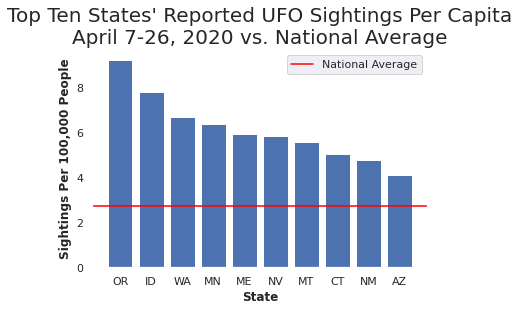

In [34]:
# GRAPH UFO SIGHTINGS PER CAPITA BY STATE DURING AND OUTSIDE OF COVID LOCKDOWN PERIOD
covid_bystate.sort_values(by=['per_cap'],ascending=False,inplace=True)

fig, ax = plt.subplots()

ax.set_facecolor('white')

ax.bar(covid_bystate['state'][0:10],covid_bystate['per_cap'][0:10])
ax.axhline(y=covid_bystate['per_cap'].mean(),color='red',label='National Average')

ax.set_title("Top Ten States' Reported UFO Sightings Per Capita\nApril 7-26, 2020 vs. National Average", fontsize=20)
ax.set_ylabel('Sightings Per 100,000 People',fontweight='bold')
ax.set_xlabel('State',fontweight='bold')

plt.yticks([0,.000002,.000004,.000006,.000008],['0','2','4','6','8'])

plt.legend()
plt.show()

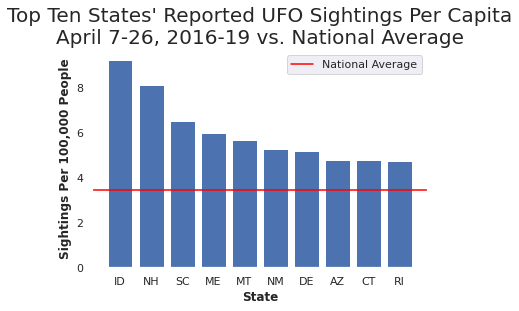

In [41]:
# GRAPH UFO SIGHTINGS PER CAPITA BY STATE DURING AND OUTSIDE OF COVID LOCKDOWN PERIOD
past_bystate.sort_values(by=['per_cap'],ascending=False,inplace=True)

fig, ax = plt.subplots()

ax.set_facecolor('white')

ax.bar(past_bystate['state'][0:10],past_bystate['per_cap'][0:10])
ax.axhline(y=past_bystate['per_cap'].mean(),color='red',label='National Average')

ax.set_title("Top Ten States' Reported UFO Sightings Per Capita\nApril 7-26, 2016-19 vs. National Average", fontsize=20)
ax.set_ylabel('Sightings Per 100,000 People',fontweight='bold')
ax.set_xlabel('State',fontweight='bold')

plt.yticks([0,.000002,.000004,.000006,.000008],['0','2','4','6','8'])

plt.legend()
plt.show()

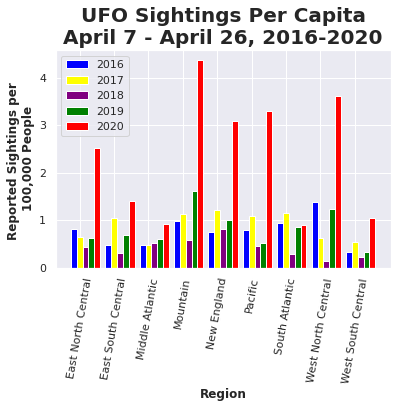

In [36]:
# GRAPH UFO SIGHTINGS PER CAPITA FOR EACH YEAR

# Need them to be ordered the same so that we can put them on a graph with the same x axis
reports16_bydiv = reports16_bydiv.sort_values(by=['division'])
reports17_bydiv = reports17_bydiv.sort_values(by=['division'])
reports18_bydiv = reports18_bydiv.sort_values(by=['division'])
reports19_bydiv = reports19_bydiv.sort_values(by=['division'])
covid_bydiv = covid_bydiv.sort_values(by=['division'])

# Set width of bar
barWidth = 0.17
 
# set height of bar
bars1 = reports16_bydiv['per_cap']
bars2 = reports17_bydiv['per_cap']
bars3 = reports18_bydiv['per_cap']
bars4 = reports19_bydiv['per_cap']
bars5 = covid_bydiv['per_cap']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, color='yellow', width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, color='purple', width=barWidth, edgecolor='white', label='2018')
plt.bar(r4, bars4, color='green', width=barWidth, edgecolor='white', label='2019')
plt.bar(r5, bars5, color='red', width=barWidth, edgecolor='white', label='2020')


# Add ticks and label things
plt.title('UFO Sightings Per Capita\nApril 7 - April 26, 2016-2020',fontsize=20,fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Reported Sightings per \n100,000 People',fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['East North Central', 'East South Central', 'Middle Atlantic',
       'Mountain', 'New England', 'Pacific', 'South Atlantic','West North Central', 'West South Central'],
       rotation=80)
plt.yticks([0,.000001,.000002,.000003,.000004],['0','1','2','3','4'])

# Create legend & Show graphic
plt.legend()
plt.show()

<font color='aqua' fontsize=16> **Question: Did COVID lockdowns significantly increase/decrease the number of UFO sightings reported?**

To answer this, we'll look at a two-sample t-test for the average sightings per capita for the same dates (4/7 - 4/26) in years 2016-2019 and year 2020.



In [37]:
stats.ttest_ind(reports16_bystate['per_cap'], covid_bystate['per_cap'], nan_policy='omit')

Ttest_indResult(statistic=-4.438094691002188, pvalue=3.0257254099768236e-05)

In [38]:
stats.ttest_ind(reports17_bystate['per_cap'], covid_bystate['per_cap'], nan_policy='omit')

Ttest_indResult(statistic=-4.048100767851991, pvalue=0.00011851042988697585)

In [39]:
stats.ttest_ind(reports18_bystate['per_cap'], covid_bystate['per_cap'], nan_policy='omit')

Ttest_indResult(statistic=-5.140984114200853, pvalue=2.1559666313415097e-06)

In [40]:
stats.ttest_ind(reports19_bystate['per_cap'], covid_bystate['per_cap'], nan_policy='omit')

Ttest_indResult(statistic=-4.235750799518936, pvalue=6.397248967811879e-05)

<font color='aqua'> ***Answer: With all p-values below 0.001 we can say with extremely high confidence that reported UFO sightings during COVID lockdown orders were significantly higher than any of the four years before it.***